# How Does Batch Normalization Help Optimization?

(Santurkar et al. 2018) - Santurkar, Shibani, Dimitris Tsipras, Andrew Ilyas, and Aleksander Madry. 2018. “How Does Batch Normalization Help Optimization?” https://arxiv.org/abs/1805.11604 (September 13, 2021).

## Introduction

As mentioned by [Ioffe and Szegedy 2015](https://arxiv.org/abs/1502.03167) and discussed [here](https://github.com/sauravmishra1710/Batch-Normalization-and-Internal-Covariate-Shift/blob/main/Batch%20Normalization%20-%20Accelerate%20Training%20by%20Reducing%20Internal%20Covariate%20Shift.ipynb), **BatchNorm** is a technique that aims to improve the training of neural networks by **stabilizing or whitening** the distributions of (activations) layer inputs. This is achieved by controlling the first two moments (mean and variance) of these distributions.

However, [Santurkar et al.](https://arxiv.org/abs/1805.11604) discuss more in depth of how the batch normalization works. The authors point that **input distributions of layer inputs has little to do with the success of BatchNorm**. Instead, a more fundamental impact of Batch Normalization on the training process is that **<ins>it makes the optimization landscape significantly smoother</ins>**. This smoothness induces a **more predictive and stable behavior of the gradients, allowing for faster training**.

The most widely accepted explanation of BatchNorm’s success, as well as its original motivation by [Ioffe and Szegedy 2015](https://arxiv.org/abs/1502.03167), is attributed to the internal covariate shift which refers to the change in the distribution of layer inputs caused by updates to the preceding layers. This change in the distribution negatively impacts training. However, [Santurkar et al.](https://arxiv.org/abs/1805.11604) argue that the link between ICS and training performance is still not very clear and they aim to clear these shortcomings.

Based on the emperical evidences, Santurkar et al. ask and aim to address the follwoing 2 questions - 

1. ***Is the effectiveness of BatchNorm indeed related to internal covariate shift?***
2. ***Is BatchNorm’s stabilization of layer input distributions even effective in reducing ICS?***

The authors show that, under natural conditions, the **<ins>Lipschitzness of both the loss and the gradients<ins>** (β-smoothness) are improved in models with BatchNorm which is the reason for the huge success of BatchNorm. 

## Batch Normalization and Internal Covariate Shift

The change in the distribution of a layer's input (internal covariate shift) leads to a change of the underlying training problem and is believed to have detrimental effect on the training process. This was the key motivation for coming up with the technique of BatchNorm was was to reduce this internal covariate shift.

Santurkar et al. investigate the connection between ICS and BatchNorm. They conduct experiments by training a standard VGG network trained on CIFAR-10 **with** and **without** BatchNorm. They observe a drastic improvement both in terms of <ins>optimization and generalization performance</ins>, for networks trained with BatchNorm layers.

However, on visualizing the extent to which BatchNorm is stabilizing the distributions of layer inputs by plotting the distribution (over a batch) of a random input over training, they notice a marginal difference in distributional stability in networks with and without BatchNorm layers. 

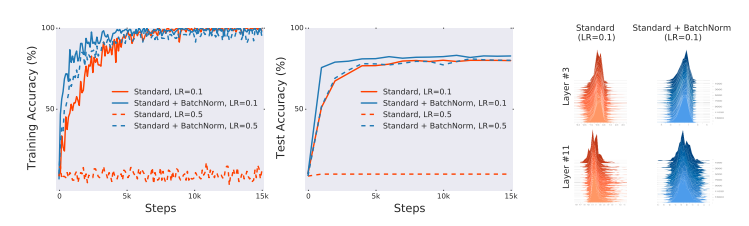
**Image Source:** [Figure 1](https://arxiv.org/pdf/1805.11604.pdf)

These emperical emperical evidences force them to address the follwoing questions - 

1. ***Is the effectiveness of BatchNorm indeed related to internal covariate shift?***
2. ***Is BatchNorm’s stabilization of layer input distributions even effective in reducing ICS?***

## Does BatchNorm’s performance stem from controlling internal covariate shift?

Another set of experiment was conducted to check the correlation between ICS, and the benefits of BN on training performances. They train 3 VGG networks (on CIFAR-10 data). The setup is described below - 


1. Standard VGG without BatchNorm layer.
2. Standard VGG with BatchNorm layer.
3. Standard VGG with BatchNorm layer and random noise injected after BatchNorm layers. <ins>Inject to each activation time-varying, non-zero mean andnon-unit variance noise independently (i.i.d distribution) to each batch normalized activation</ins>.

Such noise injection produces a severe covariate shift that skews activations at every time step. Consequently, every unit in the layer experiences a different distribution of inputs at each time step. The effect of this distributional instability on BatchNorm’s performance is reocrded and the following observations are noted - 

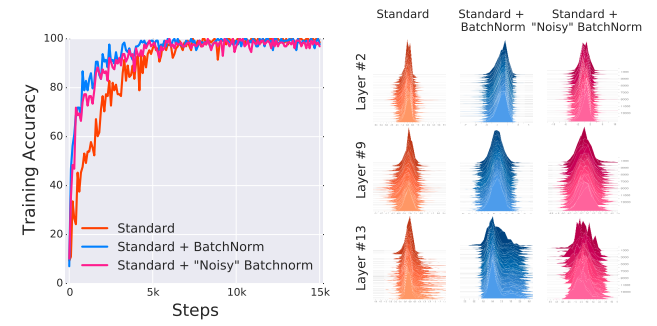
**Image Source:** [Figure 2](https://arxiv.org/pdf/1805.11604.pdf)

1. The performance difference between models with BatchNorm layers, and “noisy” BatchNorm layers is **<ins>almost non-existent</ins>**.
2. The “noisy” BatchNorm network has qualitatively less stable distributions, yet it still performs better in terms of training.

**These findings suggest the claim of** [Ioffe and Szegedy 2015](https://arxiv.org/abs/1502.03167) **that the performance gain due to BatchNorm stems from increased stability of layer input distributions is not directly related**.

## Is BatchNorm reducing internal covariate shift?

Each layer within a neural network solves an empirical risk minimization problem where it optimizes some loss function (that possibly involves later layers). Any update to the parameters of the previous layer will change these inputs, and thus changing the empirical risk minimization problem with every parameter update. This forms the core of internal covariate shift. However, as observed above this perspective does not seem to properly encapsulate the roots of BatchNorm’s success.

But,  Santurkar et al. consider a broader notion of internal covariate shift that is more tightly tied to the underlying optimization task. To quantify the extent to which the parameters in a layer would have to **“adjust”** in reaction to a parameter update in the previous layers, **<ins>they measure the difference between the gradients of each layer before and after updates to all the previous layers</ins>**. This leads to a newer defination of the Internal Covariate Shift from an optimization perspective.

"*Let **L** be the loss, **W<sup>(t)</sup><sub>1</sub>, . . . , W<sup>(t)</sup><sub>k</sub>** be the parameters of each of the **k** layers and **(x(t) , y(t))** be the batch of input-label pairs used to train the network at time **t**. We define internal covariate shift (ICS) of activation **i** at time **t** to be the difference **||G<sub>t,i</sub> − G'<sub>t,i</sub>||**, where*"

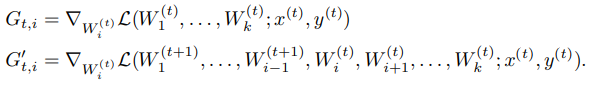
**Image Source:** [Defination 2.1](https://arxiv.org/pdf/1805.11604.pdf)

*Here, **G<sub>t,i</sub>** corresponds to the gradient of the layer parameters that would be applied during a simultaneous update of all layers. On the other hand, **G'<sub>t,i</sub>** is the same gradient after all the previous layers have been updated with their new values. The difference between **G** and **G'** thus reflects the change in the optimization landscape of **W<sub>i</sub>** caused by the changes to its input*. 

With respect to the above defination, the authors measure the extent of ICS with and without BatchNorm. This experimental setup comprised of a 25 layer deep linear network trained with full-batch gradient descent. The conventional understanding of BatchNorm suggests that the addition of BatchNorm layers in the network <ins>should increase the correlation between **G** and **G'**, thereby reducing ICS</ins>.

**Observation:** The standard network experiences almost no ICS for the entirety of training, whereas for BatchNorm it appears that **G** and **G'** are almost uncorrelated (high difference). This points towards the observation, **<ins>that from optimization point of view BatchNorm might not even reduce the internal covariate shift</ins>**.

# References

[1] [How does Batch Normalization Help Optimization?](https://www.microsoft.com/en-us/research/video/how-does-batch-normalization-help-optimization/)